In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO('yolo11n-obb.pt')
img_path = './data/images/led.jpg'

ship_class_index = [1]

In [3]:
results = model.predict(img_path)
speed = results[0].speed
total_time = speed['preprocess'] + speed['inference'] + speed['postprocess']

print(f"--- 검출 속도 (밀리초) ---")
print(f"전처리 (Preprocess): {speed['preprocess']:.1f} ms")
print(f"추론 (Inference):   {speed['inference']:.1f} ms")
print(f"후처리 (Postprocess): {speed['postprocess']:.1f} ms")
print(f"==============================")
print(f"총 검출 시간: {total_time:.1f} ms")
print(f"==============================")

results_ship = model.predict(img_path, classes=ship_class_index)
speed = results_ship[0].speed
total_time = speed['preprocess'] + speed['inference'] + speed['postprocess']

print(f"--- Only 'Ship' 검출 속도 (밀리초) ---")
print(f"전처리 (Preprocess): {speed['preprocess']:.1f} ms")
print(f"추론 (Inference):   {speed['inference']:.1f} ms")
print(f"후처리 (Postprocess): {speed['postprocess']:.1f} ms")
print(f"==============================")
print(f"총 검출 시간: {total_time:.1f} ms")
print(f"==============================")


image 1/1 /Users/cobot/Codes/yolo/ultralytics/data/images/led.jpg: 576x1024 76 ships, 581.4ms
Speed: 21.6ms preprocess, 581.4ms inference, 98.9ms postprocess per image at shape (1, 3, 576, 1024)
--- 검출 속도 (밀리초) ---
전처리 (Preprocess): 21.6 ms
추론 (Inference):   581.4 ms
후처리 (Postprocess): 98.9 ms
총 검출 시간: 702.0 ms

image 1/1 /Users/cobot/Codes/yolo/ultralytics/data/images/led.jpg: 576x1024 76 ships, 596.1ms
Speed: 21.2ms preprocess, 596.1ms inference, 54.9ms postprocess per image at shape (1, 3, 576, 1024)
--- Only 'Ship' 검출 속도 (밀리초) ---
전처리 (Preprocess): 21.2 ms
추론 (Inference):   596.1 ms
후처리 (Postprocess): 54.9 ms
총 검출 시간: 672.3 ms


In [4]:
img = results[0].plot()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_ship = results_ship[0].plot()
img_rgb_ship = cv2.cvtColor(img_ship, cv2.COLOR_BGR2RGB)

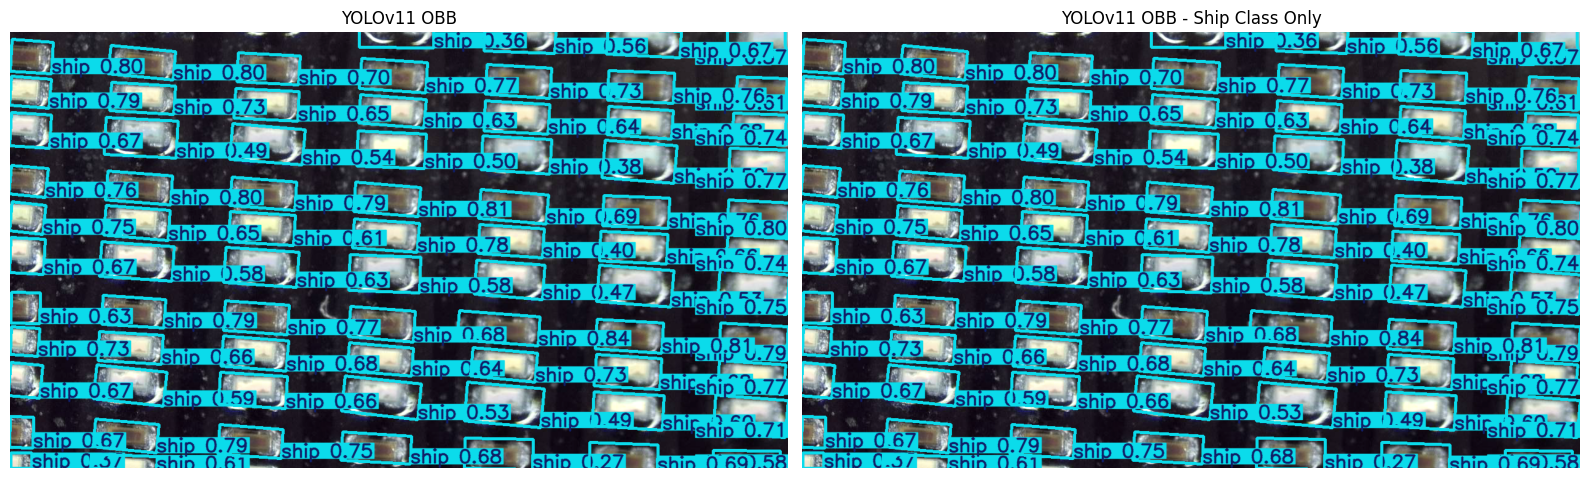

In [8]:
# 결과 이미지 출력
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img_rgb)
ax[0].set_title('YOLOv11 OBB')
ax[0].axis('off')

ax[1].imshow(img_rgb_ship)
ax[1].set_title('YOLOv11 OBB - Ship Class Only')
ax[1].axis('off')

plt.tight_layout()
plt.show()

image 1/1 /Users/cobot/Codes/yolo/ultralytics/data/images/led_tilted.jpeg: 576x1024 28 ships, 1106.2ms
Speed: 17.6ms preprocess, 1106.2ms inference, 16.4ms postprocess per image at shape (1, 3, 576, 1024)


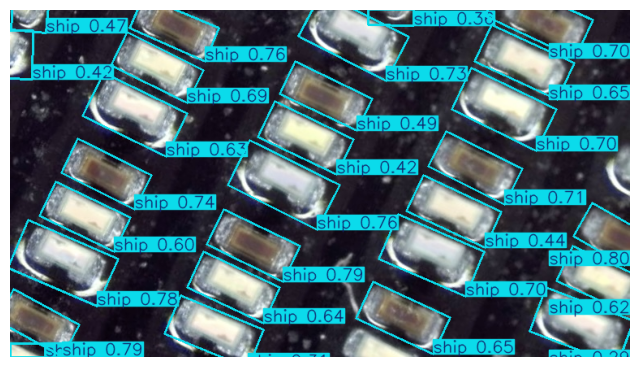

In [10]:
results = model.predict('./data/images/led_tilted.jpeg')

img = results[0].plot()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

--- Case 1: 모든 클래스 검출 시작 ---
처리된 이미지: ./data/images/led1.jpeg | 전처리: 13.50 ms | 추론: 629.40 ms | 후처리: 4.01 ms
처리된 이미지: ./data/images/led2.jpeg | 전처리: 7.64 ms | 추론: 588.13 ms | 후처리: 2.08 ms
처리된 이미지: ./data/images/led3.jpeg | 전처리: 11.22 ms | 추론: 445.76 ms | 후처리: 20.49 ms
처리된 이미지: ./data/images/led4.jpeg | 전처리: 8.40 ms | 추론: 501.43 ms | 후처리: 16.19 ms
--- Case 1: 모든 클래스 검출 완료 ---

--- Case 2: 'ship' 클래스만 검출 시작 ---
처리된 이미지: ./data/images/led1.jpeg | 전처리: 10.02 ms | 추론: 542.98 ms | 후처리: 2.94 ms
처리된 이미지: ./data/images/led2.jpeg | 전처리: 6.49 ms | 추론: 429.40 ms | 후처리: 1.78 ms
처리된 이미지: ./data/images/led3.jpeg | 전처리: 6.31 ms | 추론: 445.31 ms | 후처리: 31.10 ms
처리된 이미지: ./data/images/led4.jpeg | 전처리: 11.71 ms | 추론: 489.33 ms | 후처리: 7.66 ms
--- Case 2: 'ship' 클래스만 검출 완료 ---

       속도 비교 결과 (4장 합산)
모든 클래스 검출 총 시간: 2248.27 ms
'ship' 클래스만 검출 총 시간: 1985.04 ms
------------------------------
시간 차이: 263.23 ms
 >> 'ship'만 검출했을 때가 더 빨랐습니다.


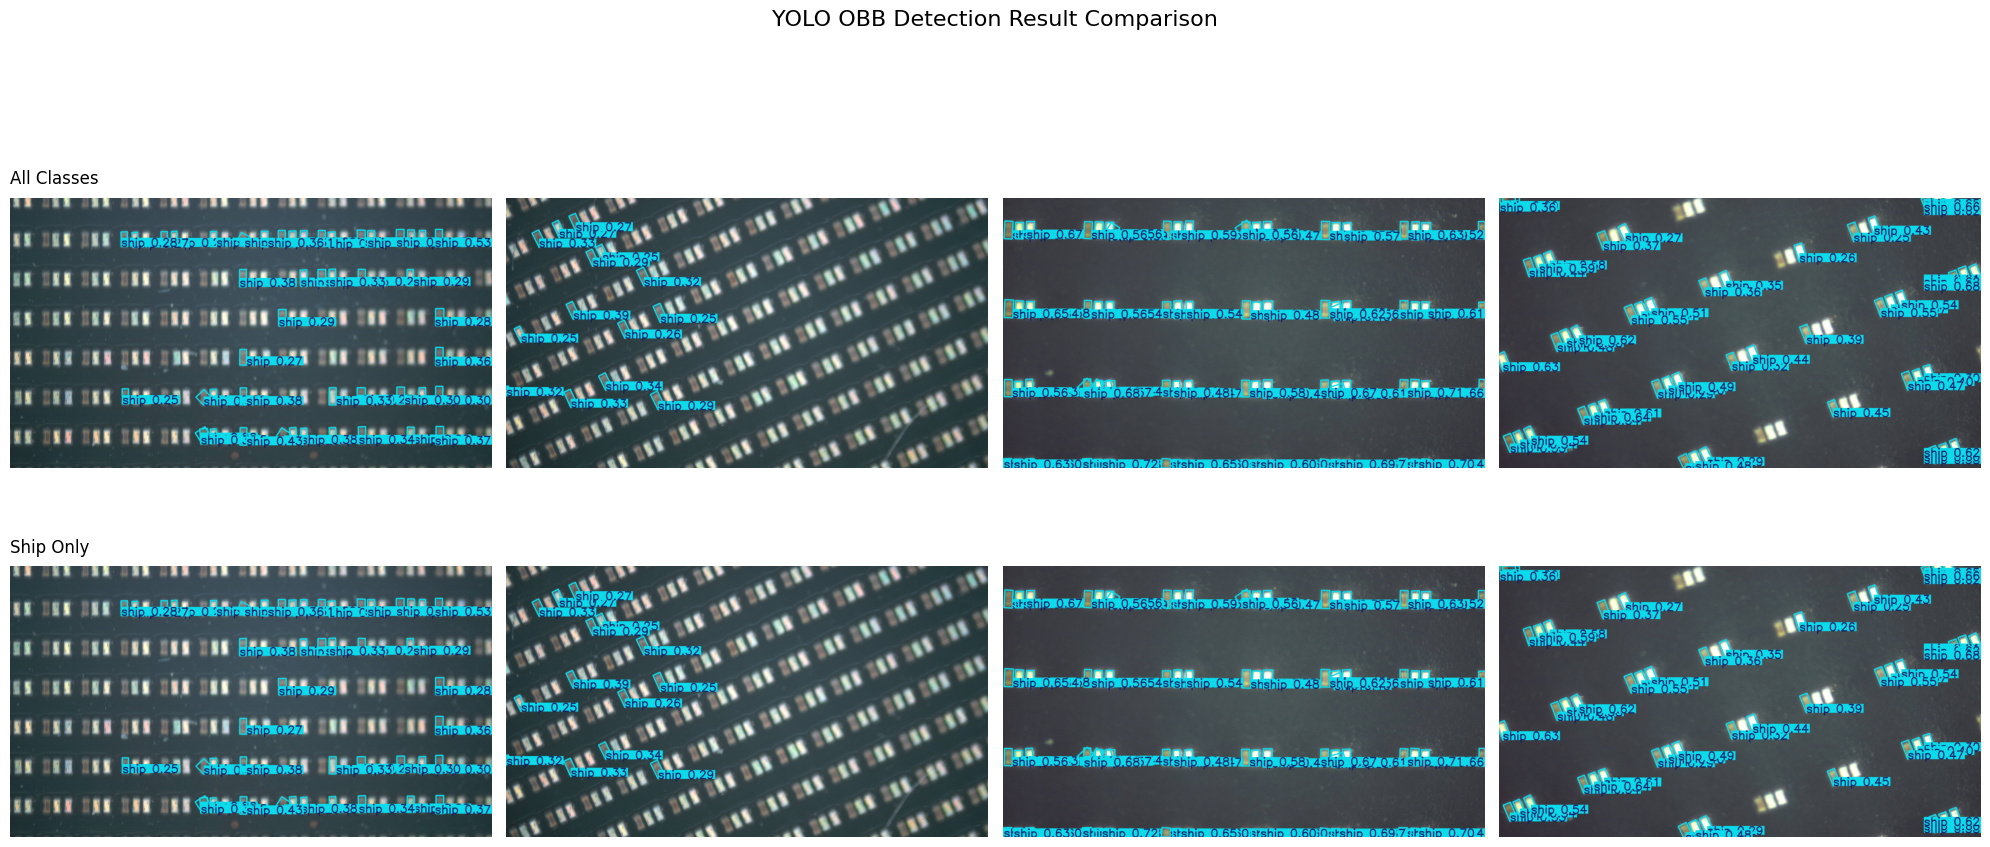

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

model = YOLO('yolo11n-obb.pt')

image_list = [
    './data/images/led1.jpeg',
    './data/images/led2.jpeg',
    './data/images/led3.jpeg',
    './data/images/led4.jpeg'
]

ship_class_index = [1]

print("--- Case 1: 모든 클래스 검출 시작 ---")
total_time_all_classes = 0
result_images_all_classes = []

for img in image_list:
    results = model.predict(img, verbose=False) # verbose=False로 터미널 출력을 깔끔하게 합니다.
    speed = results[0].speed
    total_time_all_classes += speed['preprocess'] + speed['inference'] + speed['postprocess']
    print(f"처리된 이미지: {img} | 전처리: {speed['preprocess']:.2f} ms | 추론: {speed['inference']:.2f} ms | 후처리: {speed['postprocess']:.2f} ms")
    
    # 결과 이미지를 리스트에 추가
    img_bgr = results[0].plot()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    result_images_all_classes.append(img_rgb)
print("--- Case 1: 모든 클래스 검출 완료 ---")


# ======================================================
# Case 2: 'ship' 클래스만 검출
# ======================================================
print("\n--- Case 2: 'ship' 클래스만 검출 시작 ---")
total_time_ship_only = 0
result_images_ship_only = []

for img in image_list:
    results = model.predict(img, classes=ship_class_index, verbose=False)
    speed = results[0].speed
    total_time_ship_only += speed['preprocess'] + speed['inference'] + speed['postprocess']
    print(f"처리된 이미지: {img} | 전처리: {speed['preprocess']:.2f} ms | 추론: {speed['inference']:.2f} ms | 후처리: {speed['postprocess']:.2f} ms")
    
    # 결과 이미지를 리스트에 추가
    img_bgr = results[0].plot()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    result_images_ship_only.append(img_rgb)
print("--- Case 2: 'ship' 클래스만 검출 완료 ---")


# ======================================================
# 결과 비교: 시간 및 시각화
# ======================================================
print("\n" + "="*30)
print("       속도 비교 결과 (4장 합산)")
print("="*30)
print(f"모든 클래스 검출 총 시간: {total_time_all_classes:.2f} ms")
print(f"'ship' 클래스만 검출 총 시간: {total_time_ship_only:.2f} ms")
print("-"*30)
time_diff = total_time_all_classes - total_time_ship_only
print(f"시간 차이: {abs(time_diff):.2f} ms")
if time_diff > 0:
    print(" >> 'ship'만 검출했을 때가 더 빨랐습니다.")
else:
    print(" >> 모든 클래스를 검출했을 때가 더 빨랐습니다.")
print("="*30)

# Matplotlib으로 2x4 그리드에 결과 이미지 시각화
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('YOLO OBB Detection Result Comparison', fontsize=16)

for i in range(4):
    # 첫 번째 행: 모든 클래스 검출 결과
    axes[0, i].imshow(result_images_all_classes[i])
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title('All Classes', loc='left', fontsize=12, pad=10)

    # 두 번째 행: 'ship' 클래스만 검출 결과
    axes[1, i].imshow(result_images_ship_only[i])
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title('Ship Only', loc='left', fontsize=12, pad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # suptitle과 겹치지 않게 조절
plt.show()